# MEDICAL APPOINTMENT NO SHOWS

## Download the Dataset

Dataset is downloaded from the following link:
https://www.kaggle.com/joniarroba/noshowappointments

## Import Librairies

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from datetime import datetime

## Reading the Dataset

In [333]:
#Read the dataset into a Pandas Data Frame!
medical_app = pd.read_csv('KaggleV2-May-2016.csv')

#data overview
medical_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [334]:
#check data size
print(f'the data have {medical_app.shape[0]} rows and {medical_app.shape[1]} columns')

the data have 110527 rows and 14 columns


In [335]:
#check data information
medical_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<p>We can conclude, there are:</p>
<ul>
<li>9 numerical variables: </li>
    <ul>
        <li>1 float variable : PatientId </li>
        <li>8 integers : AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism,  Handcap and SMS_received</li>
    </ul>
<li>5 categorical variables : Gender, ScheduledDay, AppointmentDay, Neighbourhood and No-show </li>
<li>There are no null values in each feature</li>
</ul>

In [336]:
# Check if there are missing values
medical_app.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<p>We can conclued there are no missing values in the dataset</p>

In [337]:
#Statistic Description of numerical variables
medical_app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<p>We can conclude:</p>
<ul>
<li>There are inconsistent age : negative age</li>
<li>less than 25% have scholarhip, hypertention, diabetes, handicap and alcoholism</li>
<li>almost 25% of patients receive SMS</li>
</ul>

In [338]:
#How many data have an inconsistent age?
sum(medical_app["Age"] <= 0)

3540

In [339]:
#let's remove rows having negative age
medical_app = medical_app[medical_app['Age'] > 0]
medical_app[['Age']].describe()

,Age
count,106987.000000
mean,38.316085
std,22.466214
min,1.000000
25%,19.000000
50%,38.000000
75%,56.000000
max,115.000000


## Feature Extraction

In [340]:
#Extract the following features: Gender, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received
X = medical_app[['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]

#Extract the target
y = medical_app['No-show']

X.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,F,62,0,1,0,0,0,0
1,M,56,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0


In [341]:
#view all columnss names
X.columns

Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received'],
      dtype='object')

In [342]:
#Rename column names incorrect spelling
X = X.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'})
X.columns

Index(['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received'],
      dtype='object')

## Preprocessing

In [343]:
#Encoding categorical variables : Gender and No-Show
encoder = LabelEncoder()
X['Gender'] = encoder.fit_transform(X[['Gender']])
y = encoder.fit_transform(y)

#Normalizing numerical variable: age
normalizer = Normalizer()
max = np.max(X['Age'])
min = np.min(X['Age'])
X['Age'] = X['Age'].apply(lambda x: (x - min)/(max - min))

X.head()

e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,0,0.535088,0,1,0,0,0,0
1,1,0.482456,0,0,0,0,0,0
2,0,0.535088,0,0,0,0,0,0
3,0,0.061404,0,0,0,0,0,0
4,0,0.482456,0,1,1,0,0,0


In [344]:
#Dealing with Nan values for No-Show feature
np.sum(np.isnan(y))

np.int64(0)

In [345]:
#Dealing with Nan values for the selected features X
np.sum(np.isnan(X))

e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Gender          0
Age             0
Scholarship     0
Hypertension    0
Diabetes        0
Alcoholism      0
Handicap        0
SMS_received    0
dtype: int64

<p>We can conclude that there are no NaN values in the data</p>

## Splitting the Data

In [346]:
# Split the data into training (80%) and temporary set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Training Tree-based Classifiers

In [347]:
'''
Model:
- a decision-tree classifier model to train the data.
- choose the best criterion for the decision tree algorithm by trying different values and validating performance on the validation set.
Note: choosing the best criterion is an one of the hyper-parameter tuning.
Classification Metrics:
- Print the accuracy score of your final classifier.
- Print the confusion matrix.
'''

#Data split quality
split_quality = ['entropy', 'gini']

for criterion in split_quality:
    # Create DecisionTreeClassifier model
    model = DecisionTreeClassifier(criterion=criterion, random_state=42)

    # Train the model on the training data
    start_time = datetime.now()
    model.fit(X_train, y_train)
    end_time = datetime.now()

    execution_time = end_time - start_time
    print(f'execution time = {execution_time}')

    # Now, evaluate the model on the testing set
    y_pred = model.predict(X_test)

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy {criterion}: {test_accuracy * 100:.2f}%')

    #evaluate the model performance using confusion matrix
    conf = confusion_matrix(y_test, y_pred)
    print(f'confusion_matrix1 = {conf} \n')


execution time = 0:00:00.109176
Test Accuracy entropy: 79.42%
confusion_matrix1 = [[16929   144]
 [ 4260    65]] 

execution time = 0:00:00.110348
Test Accuracy gini: 79.41%
confusion_matrix1 = [[16927   146]
 [ 4260    65]] 



<p>We can conclude that entropy method is slitly better than gini method in term of time execution and accuracy</p>

## Random Forest

entropy execution time = 0:01:06.721723
entropy test: best_n_estimator = 8, best_accuracy = 79.36%
gini execution time = 0:01:03.793760
gini test: best_n_estimator = 3, best_accuracy = 79.37%


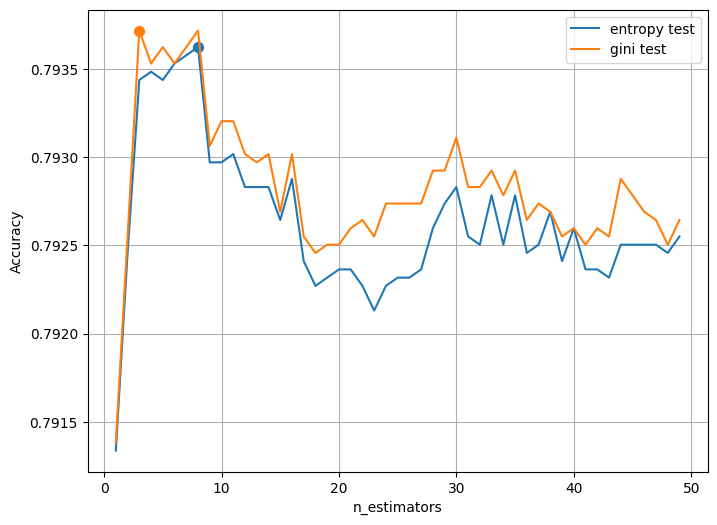

In [348]:
'''
Repeat step 6.
Increase/decrease the number of estimators in random forest and comment on the difference of the classification metrics.
'''

#Data split quality
split_quality = ['entropy', 'gini']

plt.figure(figsize=(8, 6))


for criterion in split_quality:

    test_accuracy = []

    best_val_accuracy = -1
    best_test_accuracy = -1
    max_n_estimator = 50
    start_time = datetime.now()
    for i in range(1, max_n_estimator):
        
        #create random forest model
        model = RandomForestClassifier(n_estimators=i,   criterion=criterion, random_state=42)

        # Train the model on the training data
        model.fit(X_train, y_train)
    
        # Make predictions on the  test data
        y_pred = model.predict(X_test)

        # Calculate accuracy on the test sets
        test_accuracy.append(accuracy_score(y_test, y_pred))

        #update the best number of estimator based on the highest accuracy
        if test_accuracy[-1] > best_test_accuracy:
            best_test_accuracy = test_accuracy[-1]
            test_n_estimator = i

    end_time = datetime.now()
    execution_time = end_time - start_time
    print(f'{criterion} execution time = {execution_time}')
    plt.plot(range(1, max_n_estimator), test_accuracy, label = criterion + " test")
    plt.scatter(test_n_estimator, best_test_accuracy, marker = 'o', s = 50)
    print(f'{criterion} test: best_n_estimator = {test_n_estimator}, best_accuracy = {best_test_accuracy* 100:.2f}%')


plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()





<p>Within the range form 1 to 50 of number of estimators:</p>
<ul>
<li>the gini data splitting is slitly better than entropy</li>
<li>gini need only small number of estimators (3 for our case) compared toventropy which use greater number of estimators (8 for our case) to get almost the same performance of 79.36%</li>
<li>we can conlude that gini is better than entropy in term of time consuming and performance (accuracy)</li>
</ul>

<p>General conclusion:</p>
<ul>
<li>random forest classifier suppose to improve the performance but for this dataset it is not the case!</li>
</ul>